# LA AQI Time Series work

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the data

In [4]:
lax = pd.read_pickle('../datasets/air-quality-reports/aggregates/LAX/lax.pkl')

In [4]:
lax.to_csv('./datasets/air-quality-reports/aggregates/lax.csv')

In [4]:
lax.head()

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2015-01-01,California,Los Angeles,6,37,156,Unhealthy,PM2.5,06-037-1201,16
2015-01-02,California,Los Angeles,6,37,105,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,14
2015-01-03,California,Los Angeles,6,37,106,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,17
2015-01-04,California,Los Angeles,6,37,107,Unhealthy for Sensitive Groups,PM2.5,06-037-4004,16
2015-01-05,California,Los Angeles,6,37,57,Moderate,PM2.5,06-037-4004,16


## Define train and test

In [5]:
train = lax['AQI'].loc[:'2019']

In [7]:
test = lax['AQI'].loc['2020']

## Create Holt-Winters model predicting AQI for 2020

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing

In [9]:
predictions = pd.DataFrame(test)

In [44]:
hw = ExponentialSmoothing(
    train,
    seasonal_periods=365,
    trend='mul',
    seasonal='mul'
).fit()

In [12]:
hw.summary()

Dep. Variable:,AQI,No. Observations:,1826
Model:,ExponentialSmoothing,SSE,1651322.132
Optimized:,True,AIC,13167.954
Trend:,Multiplicative,BIC,15201.101
Seasonal:,Multiplicative,AICC,13357.792
Seasonal Periods:,365,Date:,"Mon, 17 May 2021"
Box-Cox:,False,Time:,15:09:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7828571,alpha,True
smoothing_trend,0.0001,beta,True


In [45]:
predictions['hw'] = hw.forecast(len(test))

### Visualize the predictions

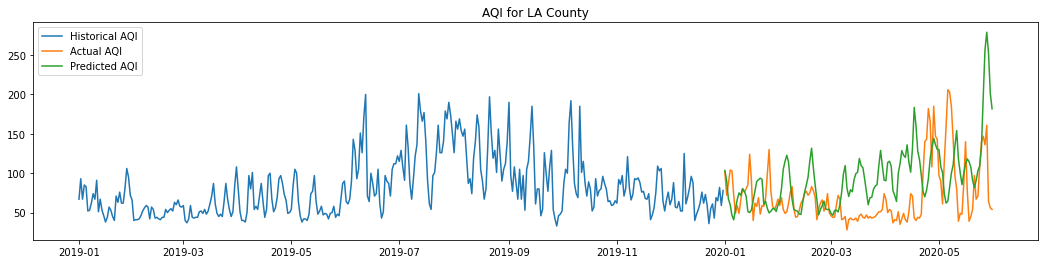

In [51]:
plt.figure(figsize = (18, 4))
plt.plot(train.loc['2019'], label = 'Historical AQI')
plt.plot(predictions['AQI'].loc[:'2020-05'], label = 'Actual AQI')
plt.plot(predictions['hw'].loc[:'2020-05'], label = 'Predicted AQI')
plt.title('AQI for LA County')
plt.legend();

## Gonna try weekly now, see if that's any different

### Convert the data to weekly

In [55]:
train_wk = train.resample('W').mean()

In [56]:
test_wk = test.resample('W').mean()

In [57]:
train_wk.head()

Date
2015-01-04    118.500000
2015-01-11     80.000000
2015-01-18     81.714286
2015-01-25    102.285714
2015-02-01     63.142857
Freq: W-SUN, Name: AQI, dtype: float64

In [66]:
hw2 = ExponentialSmoothing(
    train_wk,
    seasonal_periods=52,
    trend='add',
    seasonal='add'
).fit()

In [60]:
hw2.summary()

Dep. Variable:,AQI,No. Observations:,262
Model:,ExponentialSmoothing,SSE,117450.495
Optimized:,True,AIC,1711.622
Trend:,Multiplicative,BIC,1911.449
Seasonal:,Multiplicative,AICC,1745.336
Seasonal Periods:,52,Date:,"Mon, 17 May 2021"
Box-Cox:,False,Time:,15:21:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0049994,alpha,True
smoothing_trend,0.0049989,beta,True


In [61]:
weekly_preds = pd.DataFrame(test_wk)

In [67]:
weekly_preds['hw'] = hw2.forecast(len(test_wk))

### Visualize the weekly data

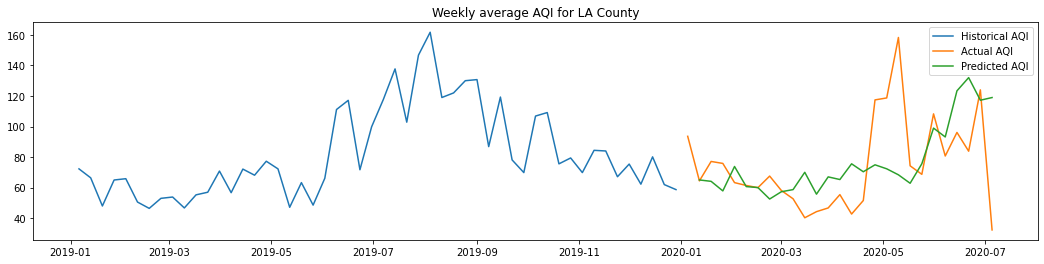

In [69]:
plt.figure(figsize = (18, 4))
plt.plot(train_wk.loc['2019'], label = 'Historical AQI')
plt.plot(weekly_preds['AQI'], label = 'Actual AQI')
plt.plot(weekly_preds['hw'], label = 'Predicted AQI')
plt.title('Weekly average AQI for LA County')
plt.legend();